<a href="https://colab.research.google.com/github/Angelo254/Moringa_Data_Science_Core_W2_Independent_Project_2021_09_Angelo_Sang_Python_Notebook/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2021_09_Angelo_Sang_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# a) Specifying the Data Analytic Question

which individuals are most likely to have or use a bank account.


# b) Metric for Success

Project will be successful when we are able to accurately answer the business problem from clean data
 

# c) Understanding the context

Data to be analyzed is demographic, showing financial services 
used by individuals across East Africa, from 2016 to 2018.


d)  Recording the Experimental Design

e) Data Relevance

# Reading in the data

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
#Reading in the data
#Dataset url = http://bit.ly/FinancialDataset
df=pd.read_csv('http://bit.ly/FinancialDataset')


# Checking our data

In [3]:
# Determining the no. of records in our dataset
#
print(df.shape)

(23524, 13)


In [4]:
# Previewing the top of our dataset
#
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# Previewing the bottom of our dataset
# 
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [8]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

country                           object
year                      datetime64[ns]
uniqueid                          object
Has a Bank account                object
Type of Location                  object
Cell Phone Access                 object
household_size                   float64
Respondent Age                   float64
gender_of_respondent              object
The relathip with head            object
marital_status                    object
Level of Educuation               object
Type of Job                       object
dtype: object

In [9]:
#year data type needs to be corrected.
#import datetime library
from datetime import datetime

#first convert the date time into string 
df['year'] = df['year'].astype('str')
df['year'] =  pd.to_datetime(df['year'],format='%Y-%m-%d')

print(df.dtypes)

country                           object
year                      datetime64[ns]
uniqueid                          object
Has a Bank account                object
Type of Location                  object
Cell Phone Access                 object
household_size                   float64
Respondent Age                   float64
gender_of_respondent              object
The relathip with head            object
marital_status                    object
Level of Educuation               object
Type of Job                       object
dtype: object


# External data source validation

validation

# Tidying data set

AxesSubplot(0.125,0.125;0.775x0.755)


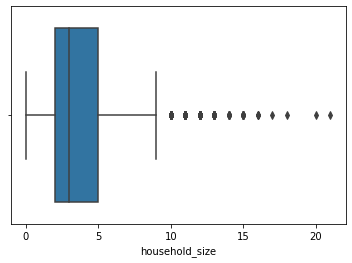

In [10]:
# Checking for Outliers in household_size
#
#we first visualize the outliers for the float and int variables.
print(sns.boxplot(x =df['household_size']))


Household_size has outliers

AxesSubplot(0.125,0.125;0.775x0.755)


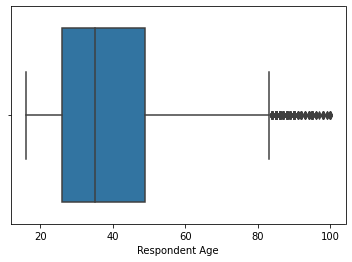

In [12]:
# Checking for Outliers in Respondent Age
#
print(sns.boxplot(x =df['Respondent Age']))

Respondents age has outliers

In [13]:
#removing the outlliers using IQR.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print(IQR)
df['year'] = df['year'].astype('str')
print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
df1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
# data is free from outliers.

household_size     3.0
Respondent Age    23.0
dtype: float64
       Cell Phone Access  Has a Bank account  ...  uniqueid   year
0                  False               False  ...     False  False
1                  False               False  ...     False  False
2                  False               False  ...     False  False
3                  False               False  ...     False  False
4                  False               False  ...     False  False
...                  ...                 ...  ...       ...    ...
23519              False               False  ...     False  False
23520              False               False  ...     False  False
23521              False               False  ...     False  False
23522              False               False  ...     False  False
23523              False               False  ...     False  False

[23524 rows x 13 columns]


# Checking for anomalies

In [27]:
#checking for missing data
df1.isnull().sum()

# Dropping null values
df2=df1.dropna()

# Rechecking my data for null values
df2.isnull().sum()


country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [26]:
#checking for duplicates.
df2.duplicated().sum()
# data has no duplicates

0

# Exploratory analysis

In [28]:
# Viewing the head of the dataset
df2.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018-01-01,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018-01-01,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018-01-01,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018-01-01,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018-01-01,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [29]:
#obtain data description.
df2.describe()

,household_size,Respondent Age
count,22728.000000,22728.000000
mean,3.579945,38.346445
std,2.080472,15.806083
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,48.000000
max,9.000000,83.000000


Text(0, 0.5, 'Bank Accounts')

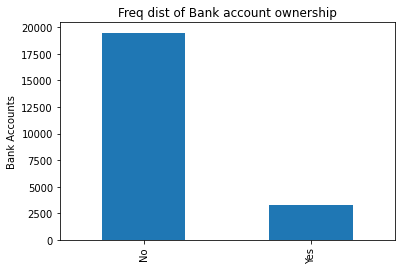

In [30]:
#visualisation of bank account ownership count.
df2['Has a Bank account'].value_counts().plot.bar(title='Freq dist of Bank account ownership', )
plt.ylabel('Bank Accounts')

#From the numbers it is clear we are yet to achieve financial inclusion.

Text(0, 0.5, 'Bank Accounts')

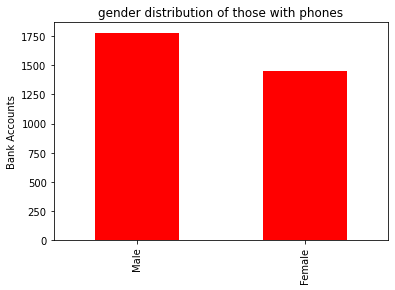

In [32]:
#a visualisation to see gender distibution of those with phones.
#a new dataframe is created where df2['Has a Bank account'] == 'Yes'
a=df2[df2['Has a Bank account'] == 'Yes']
a['gender_of_respondent'].value_counts().plot.bar(title='gender distribution of those with phones', color='red')
plt.ylabel('Bank Accounts')

# out of those with phones males are more than females.

Text(0, 0.5, 'Bank Accounts')

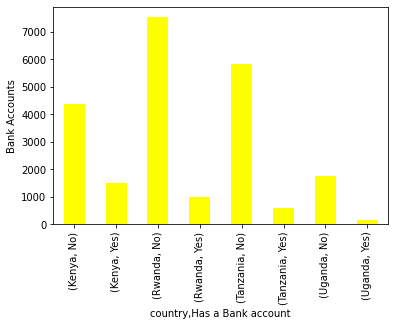

In [33]:
#A visualisation to check Bank account ownership in the country.
w=df2.groupby (['country','Has a Bank account'])['Has a Bank account'].count()
w.plot(kind='bar', color='yellow')
plt.ylabel('Bank Accounts')

Text(0, 0.5, 'Bank Accounts')

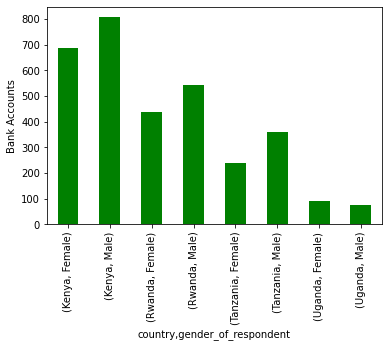

In [34]:
#A visualisation to check Bank account onwnership in the countries given gender.
w=a.groupby (['country','gender_of_respondent'])['Has a Bank account'].count()
w.plot(kind='bar', color='green')
plt.ylabel('Bank Accounts')

#In all countries more males have a bank account except in Uganda, where more females have 
# bank accounts compared to males

In [35]:
#checking for correlation of the numerical variables
df2.corr()

#there is very weak negative correlation between the variables

,household_size,Respondent Age
household_size,1.000000,-0.106259
Respondent Age,-0.106259,1.000000


Text(0, 0.5, 'Bank Accounts')

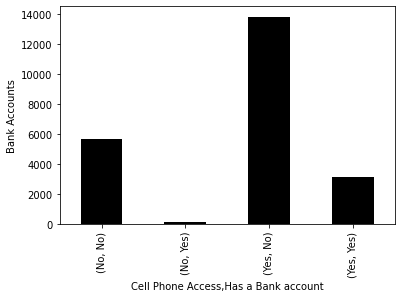

In [36]:
#visualisation on phone access and owning a bank account.
b=df2.groupby (['Cell Phone Access','Has a Bank account'])['Has a Bank account'].count()
b.plot(kind='bar', color='black')
plt.ylabel('Bank Accounts')

#out of those with no cell phone access, very few have access to a bank account.
#out of those with cell phone access, very many have no bank accounts.
#this could be due to mobile banking services offerres,therefore finding no
#need to have a bank account.

Text(0, 0.5, 'Bank Accounts')

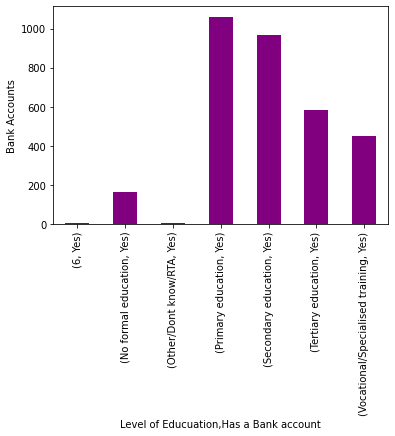

In [37]:
#level of education vs bank account ownership.
c=a.groupby (['Level of Educuation','Has a Bank account'])['Has a Bank account'].count()
c.plot(kind='bar',  color='purple')
plt.ylabel('Bank Accounts')

#Out of those with bank accounts, those who got to primary school are the 
#highest number.

Text(0, 0.5, 'Bank Accounts')

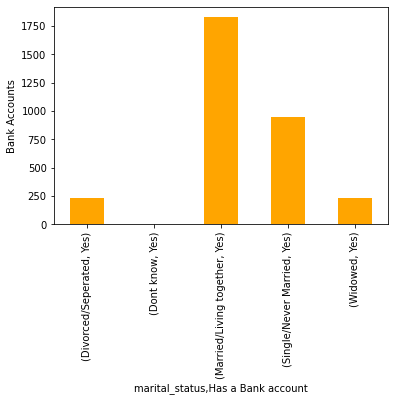

In [38]:
#marital status vs bank account ownership
d=a.groupby (['marital_status','Has a Bank account'])['Has a Bank account'].count()
d.plot(kind='bar',  color='orange')
plt.ylabel('Bank Accounts')

#those married/living together have highest number of bank accounts

Text(0, 0.5, 'Bank Accounts')

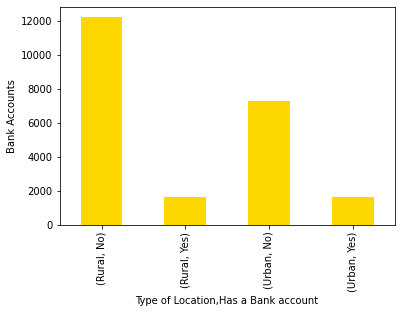

In [39]:
#rural/urban vs bank accounts.
g=df2.groupby (['Type of Location','Has a Bank account'])['Has a Bank account'].count()
g.plot(kind='bar',  color='Gold')
plt.ylabel('Bank Accounts')

#Awareness need be created in the rural areas on ownership of bank accounts

Text(0, 0.5, 'Bank Accounts')

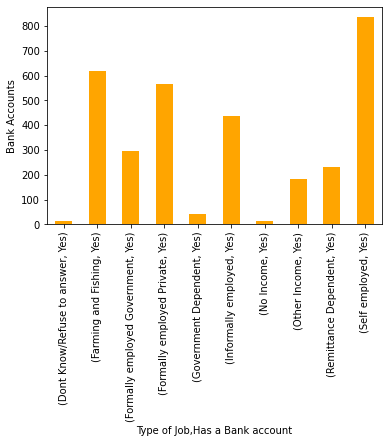

In [40]:
#type of job vs bank account ownership
e=a.groupby (['Type of Job','Has a Bank account'])['Has a Bank account'].count()
e.plot(kind='bar',  color='orange')
plt.ylabel('Bank Accounts')

#Those self employed are more likely to have a bank account

# Principal Component Analysis (PCA)

In [41]:
#Preprocessing
#divide the dataset into a feature set and corresponding labels
X = df2.iloc[:, 6:-5].values

#y = df2[['country',	'year',	'uniqueid',	'Has a Bank account',	'Type of Location',	'Cell Phone Access','gender_of_respondent'	,'The relathip with head'	,'marital_status','Level of Educuation'	,'Type of Job']].values
y=df2['gender_of_respondent']

In [42]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test

(array([[ 3., 24.],
        [ 1., 72.],
        [ 3., 34.],
        ...,
        [ 2., 45.],
        [ 9., 42.],
        [ 6., 33.]]), array([[ 5., 23.],
        [ 6., 33.],
        [ 2., 35.],
        ...,
        [ 2., 53.],
        [ 3., 45.],
        [ 2., 24.]]), 20844    Female
 15749      Male
 12657    Female
 16059      Male
 20877    Female
           ...  
 13497    Female
 20229      Male
 10124      Male
 11094      Male
 2832       Male
 Name: gender_of_respondent, Length: 18182, dtype: object, 7805       Male
 10039    Female
 18863    Female
 22048    Female
 8443     Female
           ...  
 9569     Female
 12693      Male
 7287     Female
 5480     Female
 20264      Male
 Name: gender_of_respondent, Length: 4546, dtype: object)

In [43]:
#Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
# Applying PCA

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [46]:
#Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.55190095, 0.44809905])

In [47]:
#Using 2 Principal Component Analysis
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [50]:
#Training and Making Predictions
#we use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [51]:
#Performance Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, y_pred))
print('Accuracy' + str(accuracy_score(y_test, y_pred)))


[[2701   32]
 [1771   42]]
Accuracy0.6033875934887813


# Discriminant Analysis

In [52]:
#Preprocessing
#divide the dataset into a feature set and corresponding labels
A = df2.iloc[:, 6:-5].values

#b = df2[['country',	'year',	'uniqueid',	'Has a Bank account',	'Type of Location',	'Cell Phone Access','gender_of_respondent'	,'The relathip with head'	,'marital_status','Level of Educuation'	,'Type of Job']].values
b=df2['gender_of_respondent']

In [54]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=0)
A_train, A_test, b_train, b_test

(array([[ 3., 24.],
        [ 1., 72.],
        [ 3., 34.],
        ...,
        [ 2., 45.],
        [ 9., 42.],
        [ 6., 33.]]), array([[ 5., 23.],
        [ 6., 33.],
        [ 2., 35.],
        ...,
        [ 2., 53.],
        [ 3., 45.],
        [ 2., 24.]]), 20844    Female
 15749      Male
 12657    Female
 16059      Male
 20877    Female
           ...  
 13497    Female
 20229      Male
 10124      Male
 11094      Male
 2832       Male
 Name: gender_of_respondent, Length: 18182, dtype: object, 7805       Male
 10039    Female
 18863    Female
 22048    Female
 8443     Female
           ...  
 9569     Female
 12693      Male
 7287     Female
 5480     Female
 20264      Male
 Name: gender_of_respondent, Length: 4546, dtype: object)

In [55]:
#Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
A_train = sc.fit_transform(A_train)
A_test = sc.transform(A_test)

In [56]:
#performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
A_train = lda.fit_transform(A_train, b_train)
A_test = lda.transform(A_test)

In [59]:
#Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(A_train, b_train)
b_pred = classifier.predict(A_test)

In [61]:
#Evaluating the Performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(b_test, b_pred))
print('Accuracy' + str(accuracy_score(b_test, b_pred)))

[[2715   18]
 [1804    9]]
Accuracy0.5992080950285966


# RECOMMENDATION

It is clear from our analysis that financial inclusion is yet to be achieved. 
Some recommendations include:

1) Since the number of women with bank accounts is lower, Banks should target women groups and provide financial education to them.

2)  Kenya has the highest number of people with bank accounts.Bank managers in other countries can do benchmarking from the kenyan banking sector.

3)Ensure financial education reaches the rural areas, since many people from those areas do not have bank accounts.

